<a href="https://colab.research.google.com/github/devyulbae/AIClass/blob/main/A10_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import functools
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from transformers import TFViTModel

In [ ]:
DATA_PATH = "/content/drive/MyDrive/dataset/Animals_10"

In [ ]:
dataset_dir_path = os.path.join(DATA_PATH, "raw-img")
print(dataset_dir_path)

/content/drive/MyDrive/dataset/Animals_10/raw-img


In [ ]:
get_dir_list = os.listdir(dataset_dir_path)
print(get_dir_list)

['mucca', 'farfalla', 'gallina', 'cavallo', 'pecora', 'gatto', 'cane', 'scoiattolo', 'ragno', 'elefante']


In [ ]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}

In [ ]:
get_idx_lable = {}
get_label_idx = []
for idx, lable in enumerate(get_dir_list):
    get_idx_lable[translate[lable]] = idx
    get_label_idx.append(translate[lable])
print(get_idx_lable)
print(get_label_idx)

{'cow': 0, 'butterfly': 1, 'chicken': 2, 'horse': 3, 'sheep': 4, 'cat': 5, 'dog': 6, 'squirrel': 7, 'spider': 8, 'elephant': 9}
['cow', 'butterfly', 'chicken', 'horse', 'sheep', 'cat', 'dog', 'squirrel', 'spider', 'elephant']


In [ ]:
get_all_datalist, get_all_label = [], []
for get_dir in get_dir_list:
    get_dir_path = os.path.join(dataset_dir_path, get_dir)
    get_file_list = os.listdir(get_dir_path)
    for get_file in get_file_list:
        get_file_path = os.path.join(get_dir_path, get_file)
        get_all_datalist.append(get_file_path)
        translate_lable = translate[get_file_path.split("/")[-2]]
        get_all_label.append(translate_lable)

print(get_all_datalist)
print(set(get_all_label))

['/content/drive/MyDrive/dataset/Animals_10/raw-img/mucca/OIP-6XBZIAF5HUK7s1CfQZmR2gHaES.jpeg', '/content/drive/MyDrive/dataset/Animals_10/raw-img/mucca/OIP-1Jl6a3q2xMTNnc4nywKROwHaE8.jpeg', '/content/drive/MyDrive/dataset/Animals_10/raw-img/mucca/OIP-TsyM75KcxbCcXeAH2KK2iAHaEv.jpeg', '/content/drive/MyDrive/dataset/Animals_10/raw-img/mucca/OIP-FvkEIYTox6JR5ZvHHW-pywHaFj.jpeg', '/content/drive/MyDrive/dataset/Animals_10/raw-img/mucca/OIP-SSu1VqLjOa0O_rlVubCglQHaE8.jpeg', '/content/drive/MyDrive/dataset/Animals_10/raw-img/mucca/OIP-WV3AV0AER7ow9bKhbkf_uAHaFj.jpeg', '/content/drive/MyDrive/dataset/Animals_10/raw-img/mucca/OIP-B64AtjjfKv5-opweckOLgQAAAA.jpeg', '/content/drive/MyDrive/dataset/Animals_10/raw-img/mucca/OIP-2RxYo09k70tm8lyI2VB7oAHaE9.jpeg', '/content/drive/MyDrive/dataset/Animals_10/raw-img/mucca/OIP-NkRS4TVHA0wgReTxST6NcwHaE9.jpeg', '/content/drive/MyDrive/dataset/Animals_10/raw-img/mucca/OIP-RDyQhVpWbcCG08G9rxQ0aQHaFh.jpeg', '/content/drive/MyDrive/dataset/Animals_10/raw-im

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(get_all_datalist, get_all_label, test_size=0.2, random_state=42)

In [ ]:
print(len(train_data), len(train_label))
print(len(test_data), len(test_label))

21055 21055
5264 5264


In [ ]:
train_df = pd.DataFrame({
    'data': train_data,
    'label': train_label
})

test_df = pd.DataFrame({
    'data': test_data,
    'label': test_label
})

print(train_df.head())
print(test_df.head())

                                                data      label
0  /content/drive/MyDrive/dataset/Animals_10/raw-...        dog
1  /content/drive/MyDrive/dataset/Animals_10/raw-...      sheep
2  /content/drive/MyDrive/dataset/Animals_10/raw-...    chicken
3  /content/drive/MyDrive/dataset/Animals_10/raw-...      sheep
4  /content/drive/MyDrive/dataset/Animals_10/raw-...  butterfly
                                                data  label
0  /content/drive/MyDrive/dataset/Animals_10/raw-...  horse
1  /content/drive/MyDrive/dataset/Animals_10/raw-...    dog
2  /content/drive/MyDrive/dataset/Animals_10/raw-...  sheep
3  /content/drive/MyDrive/dataset/Animals_10/raw-...  horse
4  /content/drive/MyDrive/dataset/Animals_10/raw-...    cow


In [ ]:
batch_size = 128
image_size = 224


In [ ]:
train_idg = ImageDataGenerator(rescale=1./255,
                               rotation_range=0.1,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               vertical_flip=False)

test_idg = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_idg.flow_from_dataframe(dataframe=train_df,
                                                directory=None,
                                                x_col="data",
                                                y_col="label",
                                                class_mode="categorical",
                                                target_size=(224,224),
                                                batch_size=batch_size)

test_generator = test_idg.flow_from_dataframe(dataframe=test_df,
                                              directory=None,
                                              x_col="data",
                                              y_col="label",
                                              class_mode="categorical",
                                              target_size=(224,224),
                                              batch_size=batch_size)

Found 21055 validated image filenames belonging to 10 classes.
Found 5264 validated image filenames belonging to 10 classes.


In [ ]:
# 데이터셋에 저장된 이미지를 출력하는 함수
# 이미지 확인을 위해 사용한다.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

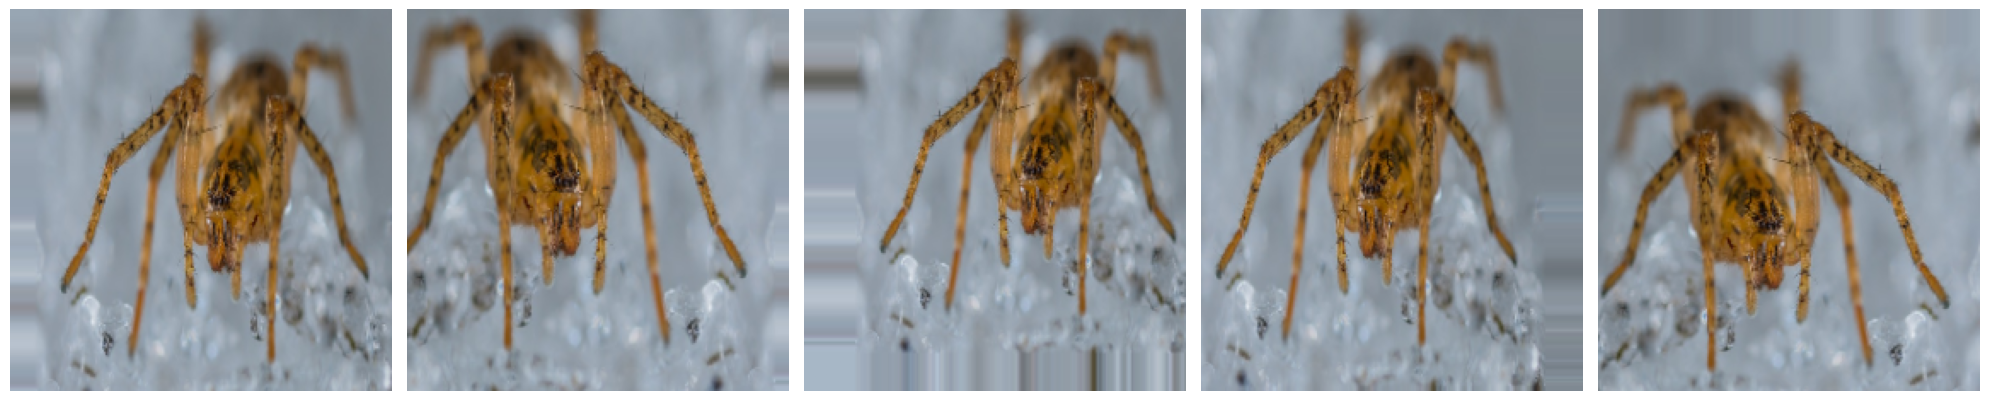

In [ ]:
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
base_model = TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

pixel_values = tf.keras.layers.Input(shape=(224, 224, 3), dtype='float32')
permute = tf.keras.layers.Permute((3, 1, 2))(pixel_values) # C H W = 3 1 2

# model layer
vit = base_model.vit(permute)[0]
classifier = tf.keras.layers.Dense(10, name='outputs')(vit[:, 0, :])

# model
model = tf.keras.Model(inputs=pixel_values, outputs=classifier)

# define loss
loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# define metrics
metrics=tf.keras.metrics.CategoricalAccuracy(name="accuracy")

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=loss,
              metrics=metrics)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/346M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at google/vit-base-patch16-224-in21k.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     monitor='val_loss',
                                                     restore_best_weights=True,
                                                     verbose=1)

In [ ]:
train_results = model.fit(
    train_generator,
    steps_per_epoch=len(train_data) // batch_size,
    validation_data=test_generator,
    validation_steps=len(test_data) // batch_size,
    epochs=100,
    callbacks=[early_stopping_cb]
)

Epoch 1/100


164/164 [==============================] - 20285s 124s/step - loss: 0.2380 - accuracy: 0.9503 - val_loss: 0.0845 - val_accuracy: 0.9779
Epoch 2/100
164/164 [==============================] - 299s 2s/step - loss: 0.0510 - accuracy: 0.9875 - val_loss: 0.0584 - val_accuracy: 0.9849
Epoch 3/100
164/164 [==============================] - 300s 2s/step - loss: 0.0345 - accuracy: 0.9916 - val_loss: 0.0535 - val_accuracy: 0.9844
Epoch 4/100
164/164 [==============================] - 301s 2s/step - loss: 0.0289 - accuracy: 0.9930 - val_loss: 0.0490 - val_accuracy: 0.9878
Epoch 5/100
164/164 [==============================] - 303s 2s/step - loss: 0.0202 - accuracy: 0.9953 - val_loss: 0.0830 - val_accuracy: 0.9783
Epoch 6/100
164/164 [==============================] - 305s 2s/step - loss: 0.0221 - accuracy: 0.9941 - val_loss: 0.0582 - val_accuracy: 0.9836
Epoch 7/100
164/164 [==============================] - 305s 2s/step - loss: 0.0186 - accuracy: 0.9948 - val_loss: 0.0641 - val_accuracy: 0.9846
